![Schematic overview](../figures/schematic.png){width=30%}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

import beforerr.matplotlib as bmpl

plt.style.use('publication')
# set font size
plt.rcParams.update({'font.size': 14})

In [3]:
red = "#D55E00"
blue = "#0072B2"
green = "#009E73"
grey = "#999999"

In [4]:
def figtext(x, y, s, **kwargs):
    kwargs = {"ha": "center", "va": "center"} | kwargs
    plt.figtext(x, y, s, **kwargs)

def axtext(x, y, s, **kwargs):
    kwargs = {"ha": "center", "va": "center"} | kwargs
    plt.text(x, y, s, **kwargs)

def boxtext(x, y, t, **kwargs):
    bbox = dict(facecolor="none")
    axtext(x, y, t, bbox=bbox, **kwargs)

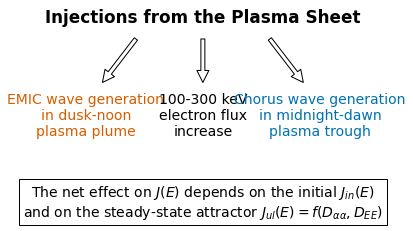

In [5]:
# Adding the main annotation text
def plot_part_1(ax: Axes):
    t = "Injections from the Plasma Sheet"
    t1 = "EMIC wave generation\nin dusk-noon\nplasma plume"
    t2 = "100-300 keV\nelectron flux\nincrease"
    t3 = "Chorus wave generation\nin midnight-dawn\nplasma trough"
    summary = "The net effect on $J(E)$ depends on the initial $J_{in}(E)$\nand on the steady-state attractor $J_{ul}(E) = f(D_{αα}, D_{EE})$"

    ax.set_axis_off()
    axtext(0.5, 0.95, t, fontsize="large", weight="bold")
    axtext(0.15, 0.5, t1, color=red)
    axtext(0.5, 0.5, t2)
    axtext(0.85, 0.5, t3, color=blue)
    boxtext(0.5, 0.1, summary)

    def arrow(xy, xytext):
        ax.annotate(
            "",
            xy=xy,
            xytext=xytext,
            arrowprops=dict(facecolor="black", fc="none"),
            va="center",
            ha="center",
        )

    arrow((0.2, 0.65), (0.3, 0.85))
    arrow((0.5, 0.65), (0.5, 0.85))
    arrow((0.8, 0.65), (0.7, 0.85))


fig, axes = plt.subplots(1, 1)
plot_part_1(axes)

In [6]:
xlabel = "Energy"
ylabel = r"$\frac{J(E)}{J(E_0)}$"

def set_axis(ax: Axes, xlabel = xlabel, ylabel = ylabel):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, rotation=0, fontsize="large")
    lims = (-0.05, 1.05)
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
    # remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # remove the frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [7]:
# Data for the left plot (Moderate injections)
def f(x, a = 0):
    return 1 - np.exp(a * x) * x

In [8]:
def pairlimits(
    pair, 
    xlim = None,
    ylim = None
):
    if xlim is not None:
        pair = filter(lambda x: x[0] >= xlim[0] and x[0] <= xlim[1], pair)
    if ylim is not None:
        pair = filter(lambda x: x[1] >= ylim[0] and x[1] <= ylim[1], pair)
    return pair
    

def limits(x,y,xlim=None,ylim=None):
    pair = pairlimits(zip(x,y), xlim, ylim)
    return list(zip(*pair))
    

In [9]:
def arrowtext(ax: Axes, t, xy=(0.1, 0.1), **kwargs):
    ax.annotate(
        t,
        xy=xy,
        xytext=(0.1, -0.07),
        arrowprops=dict(facecolor="black"),
        xycoords="axes fraction",
        textcoords="axes fraction",
        va="center",
        ha="center",
    )
    
def addtexts(ax):
    ax.text(1,0.3, "$t_0$")
    ax.text(1,0.2, "$t_1$")
    ax.text(1,0.1, "$J_{in}(E)$")
    ax.text(1,0, "$J_{ul}(E)$", color=grey)

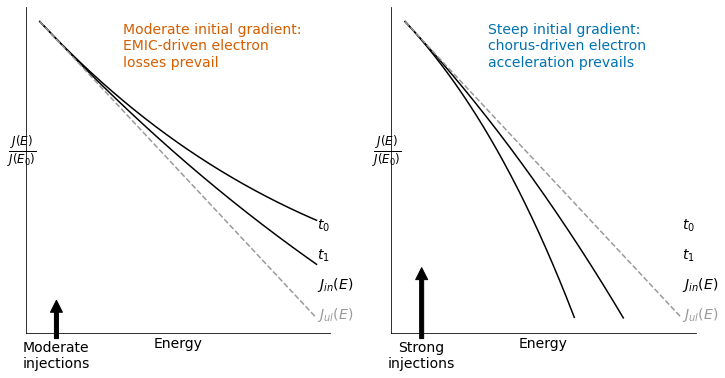

In [10]:
def plot_part_2(axes: list[Axes]):
    f0title = "Moderate\ninjections"
    f1title = "Strong\ninjections"

    f0text = "Moderate initial gradient:\nEMIC-driven electron\nlosses prevail"
    f1text = "Steep initial gradient:\nchorus-driven electron\nacceleration prevails"
    
    erg = np.linspace(0, 1, 1000)
    J_ul = f(erg)
    J_t0_left = f(erg, -0.4)
    J_t1_left = f(erg, -0.2)
    J_t0_right = f(erg, 0.8)
    J_t1_right = f(erg, 0.3)
    
    # Left plot: Moderate injections
    axes[0].plot(erg, J_t0_left, label="J_in(E)", color="black")
    axes[0].plot(erg, J_t1_left, label="J_in(E)", color="black")
    axes[0].plot(erg, J_ul, label="J_ul(E)", color=grey, linestyle="--")

    # Right plot: Strong injections
    axes[1].plot(*limits(erg, J_t0_right, ylim=(0,1)), label="J_in(E)", color="black")
    axes[1].plot(*limits(erg, J_t1_right, ylim=(0,1)), label="J_in(E)", color="black")
    axes[1].plot(erg, J_ul, label="J_ul(E)", color=grey, linestyle="--")

    axes[0].text(0.3, 0.85, f0text, color=red)
    arrowtext(axes[0], f0title, xy=(0.1, 0.1))
    addtexts(axes[0])
    set_axis(axes[0])

    axes[1].text(0.3, 0.85, f1text, color=blue)
    arrowtext(axes[1], f1title, xy = (0.1, 0.2))
    addtexts(axes[1])
    set_axis(axes[1])
    
fig,axes = plt.subplots(1,2,figsize=(12, 6))
plot_part_2(axes)


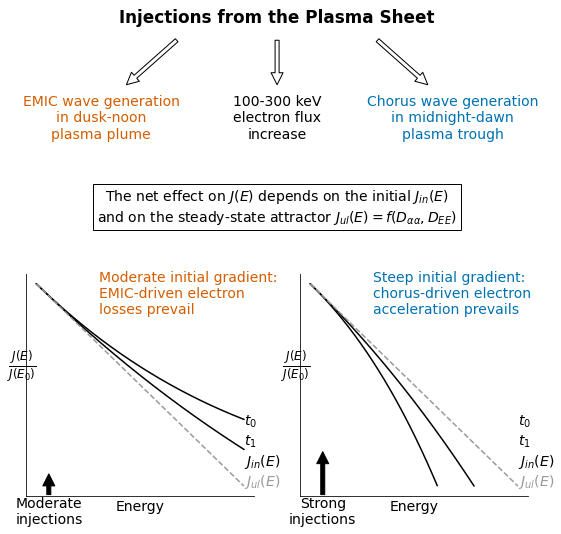

In [11]:
# Create figure and subplots
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2,2,(1,2))
plot_part_1(ax)

ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
plot_part_2([ax2, ax3])
fig.savefig("../figures/schematic.pdf")